In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [2]:
from betacal import BetaCalibration
from  scipy.stats import beta
from matplotlib.pyplot import figure 


{'pred_probs': array([0.03580042, 0.070764  , 0.12136943, 0.17104232, 0.22115951,
        0.26696593, 0.31780119]),
 'emp_probs': array([0.00204825, 0.00722022, 0.01721939, 0.02514793, 0.03041825,
        0.06451613, 0.22222222]),
 'bin_counts': array([4394., 4709., 1568.,  676.,  263.,   62.,    9.])}

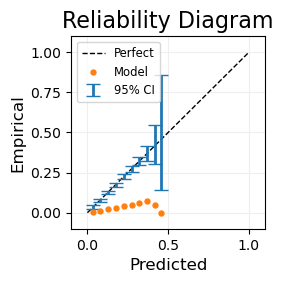

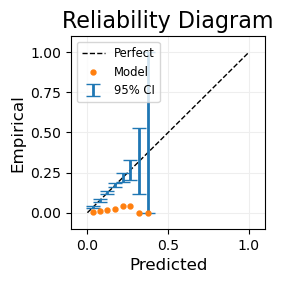

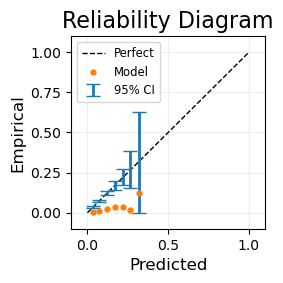

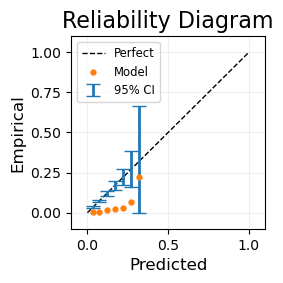

In [3]:
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'], tp1)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test2['golds'], tp2)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test3['golds'], tp3)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test4['golds'], tp4)

In [4]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]
### TRY BETA

In [5]:
def iso_smote_plot(pos, subneg, p_test, y_test, 
               synth_size, wei):
        
    a, b, loc, scale = beta.fit(pos) # floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    #many_pos = synth_pos
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    inv_prob = np.sqrt(1/probs)

   # weights = np.where(subgold==1,inv_prob ,1)
    weights = np.where(subgold==1,wei ,1)

    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(   (probs), subgold, sample_weight = weights)
    iso_test = iso.predict(    ( p_test) )

    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram(y_test,  iso_test) #, error_bars = False)
    return iso_test

In [6]:
w1 = np.mean(gold1)**.5
w2 = np.mean(gold2)**.5
w3 = np.mean(gold3)**.5
w4 = np.mean(gold4)**.5

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


array([0.02345844, 0.02345844, 0.02345844, ..., 0.02345844, 0.02345844,
       0.02345844])

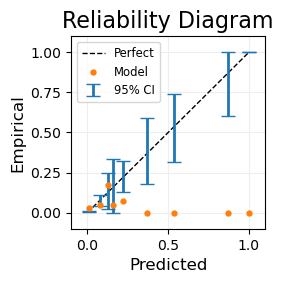

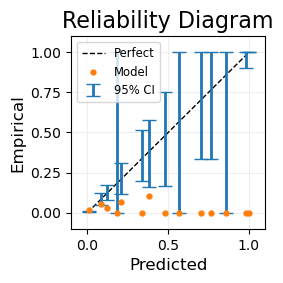

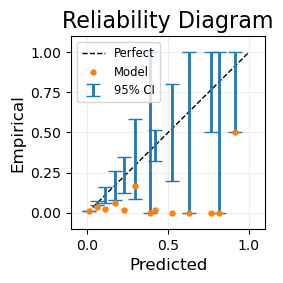

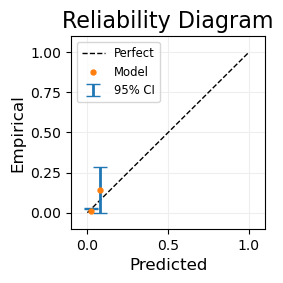

In [7]:
i1_1 = iso_smote_plot(pos_1, subneg=np.random.choice(neg_1, 80*sum(gold1)),
           p_test = tp1, y_test= M_test1['golds'],   synth_size=10, wei = w1) 

iso_smote_plot(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),
            p_test = tp2, y_test= M_test2['golds'],   synth_size=15, wei = w2)
iso_smote_plot(pos_3, subneg=np.random.choice(neg_3, 40*sum(gold3)),
            p_test = tp3, y_test= M_test3['golds'],   synth_size=15, wei = w3)
iso_smote_plot(pos_4, subneg=np.random.choice(neg_4, 40*sum(gold4)),
            p_test = tp4, y_test= M_test4['golds'],   synth_size=10, wei = w4)

In [8]:
def iso_smote(pos, subneg, p_test, 
               synth_size, wei):
        
   # a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    a, b, loc, scale = beta.fit(pos) # floc=0, fscale=1)

    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    #many_pos = synth_pos
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    
    weights = np.where(subgold==1, wei ,1)

    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(   (probs), subgold, sample_weight = weights)
    iso_test = iso.predict(    ( p_test) )

    return iso_test

{'pred_probs': array([0.00836098, 0.07045459, 0.13483203, 0.16945131, 0.21363616,
        0.27670152, 0.30280684, 0.35824324, 0.43136187, 0.51196653,
        0.58387118, 0.63790276, 0.76664476, 0.96564479, 1.        ]),
 'emp_probs': array([0.0281754 , 0.06304348, 0.05172414, 0.11594203, 0.06451613,
        0.11111111, 0.05263158, 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'bin_counts': array([1.5439e+04, 4.6000e+02, 5.8000e+01, 6.9000e+01, 3.1000e+01,
        9.0000e+00, 1.9000e+01, 4.0000e+00, 6.0000e+00, 1.5000e+01,
        2.0000e+00, 7.0000e+00, 6.0000e+00, 5.0000e+00, 2.0000e+00])}

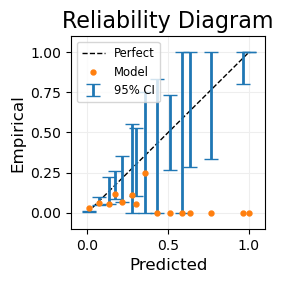

In [9]:
I1 = []
for i in range(20):
    I1.append(iso_smote(pos_1, subneg=np.random.choice(neg_1, 80*sum(gold1)),
            p_test = tp1,   synth_size=10, wei = w1))
IM1 = np.array( [l for l in I1])
MaxI1 = IM1.max(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'],  MaxI1)


{'pred_probs': array([0.00929388, 0.07288491, 0.1142936 , 0.16986104, 0.23631888,
        0.29138771, 0.32630341, 0.38957339, 0.54038814, 0.58146747,
        0.65470773, 0.87112064, 0.92183103, 0.97406099, 1.        ]),
 'emp_probs': array([0.01427615, 0.03693182, 0.03773585, 0.02173913, 0.04166667,
        0.1       , 0.03703704, 0.        , 0.0952381 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'bin_counts': array([1.3449e+04, 3.5200e+02, 2.1200e+02, 4.6000e+01, 2.4000e+01,
        2.0000e+01, 2.7000e+01, 3.8000e+01, 2.1000e+01, 1.2000e+01,
        4.0000e+00, 7.0000e+00, 2.0000e+00, 3.0000e+00, 9.0000e+00])}

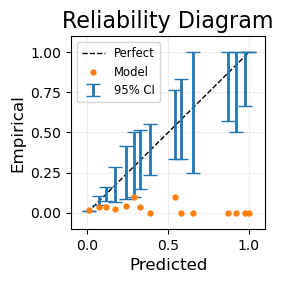

In [10]:
I2 = []
for i in range(20):
    I2.append(iso_smote(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),
            p_test = tp2,   synth_size=15, wei = w2))
IM2 = np.array( [l for l in I2])
MaxI2 = IM2.max(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test2['golds'],  MaxI2)


#iso_smote_plot(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),
#            p_test = tp2, y_test= M_test2['golds'],   synth_size=15, wei = w2)

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


array([0.00803064, 0.00507029, 0.01120221, ..., 0.01338138, 0.00803064,
       0.04955964])

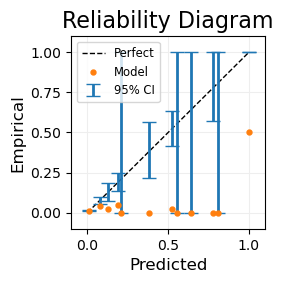

In [11]:
iso_smote_plot(pos_3, subneg=np.random.choice(neg_3, 40*sum(gold3)),
            p_test = tp3, y_test= M_test3['golds'],   synth_size=15, wei = w3)
 

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1)

{'pred_probs': array([0.01203809, 0.06912722, 0.11726674, 0.16992091, 0.22561436,
        0.27594915, 0.32604448, 0.36333659, 0.43623772, 0.46896267,
        0.53091461, 0.58895143, 0.68741238, 0.77413635, 0.80276512,
        0.96744827]),
 'emp_probs': array([0.00878516, 0.03329506, 0.04069767, 0.02352941, 0.05357143,
        0.01818182, 0.09090909, 0.        , 0.02380952, 0.04      ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       ]),
 'bin_counts': array([1.1269e+04, 8.7100e+02, 3.4400e+02, 8.5000e+01, 5.6000e+01,
        5.5000e+01, 2.2000e+01, 2.1000e+01, 4.2000e+01, 2.5000e+01,
        1.1000e+01, 1.0000e+01, 8.0000e+00, 3.0000e+00, 5.0000e+00,
        2.0000e+00])}

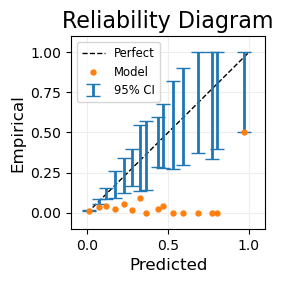

In [12]:
I3 = []
for i in range(20):
    I3.append(iso_smote(pos_3, subneg=np.random.choice(neg_3, 45*sum(gold3)),
            p_test = tp3 ,  synth_size=20, wei = w3))
IM3 = np.array( [l for l in I3])
MaxI3 = IM3.mean(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test3['golds'],  MaxI3)

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


array([0.02343209, 0.02343209, 0.02343209, ..., 0.02343209, 0.02343209,
       0.02343209])

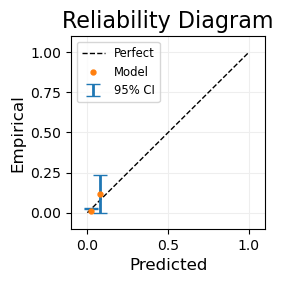

In [13]:
iso_smote_plot(pos_4, subneg=np.random.choice(neg_4, 40*sum(gold4)),
            p_test = tp4, y_test= M_test4['golds'],   synth_size=10, wei = w4)

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1)

{'pred_probs': array([0.02901467, 0.08205253, 0.13024137, 0.23250298, 0.28385263,
        0.42372804]),
 'emp_probs': array([0.00848765, 0.        , 0.        , 1.        , 1.        ,
        0.        ]),
 'bin_counts': array([1.1664e+04, 3.0000e+00, 6.0000e+00, 1.0000e+00, 1.0000e+00,
        6.0000e+00])}

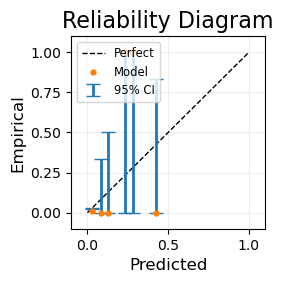

In [19]:
I4 = []
for i in range(100):
    I4.append(iso_smote(pos_4, subneg=np.random.choice(neg_4, 50*sum(gold4)),
            p_test = tp4 ,  synth_size=5, wei = .25))
IM4 = np.array( [l for l in I4])
MaxI4 = IM4.mean(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test4['golds'],  MaxI4)

In [16]:
iso_smote(pos_3, subneg=np.random.choice(neg_3, 40*sum(gold3)),
           p_test = tp3, y_test= M_test3['golds'],   synth_size=15)

TypeError: iso_smote() got an unexpected keyword argument 'y_test'

In [17]:
iso_smote(pos_4, subneg=np.random.choice(neg_4, 20*sum(gold4)),
           p_test = tp4, y_test= M_test4['golds'],   synth_size=3)

TypeError: iso_smote() got an unexpected keyword argument 'y_test'

In [ ]:
plt.hist()

{'pred_probs': array([0.00735269, 0.06504598, 0.12350673, 0.17669335, 0.2190419 ,
        0.26153621, 0.32371766, 0.3805733 , 0.41986397, 0.46744519,
        0.54272302, 0.58154082, 0.65187698, 0.8678913 , 1.        ]),
 'emp_probs': array([0.02859346, 0.05571848, 0.09565217, 0.05263158, 0.07692308,
        0.05555556, 0.14285714, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'bin_counts': array([1.5563e+04, 3.4100e+02, 1.1500e+02, 3.8000e+01, 1.3000e+01,
        1.8000e+01, 7.0000e+00, 8.0000e+00, 7.0000e+00, 2.0000e+00,
        7.0000e+00, 1.0000e+00, 5.0000e+00, 5.0000e+00, 2.0000e+00])}

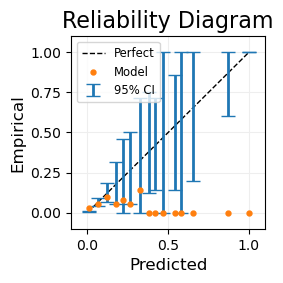

In [18]:
IM1_med = np.median(IM1, axis = 0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'],  IM1_med)


In [ ]:
?mli.plot_reliability_diagram

In [20]:
from scipy import stats as stats

In [21]:
?stats.trim_mean

Signature: stats.trim_mean(a, proportiontocut, axis=0)
Docstring:
Return mean of array after trimming distribution from both tails.

If `proportiontocut` = 0.1, slices off 'leftmost' and 'rightmost' 10% of
scores. The input is sorted before slicing. Slices off less if proportion
results in a non-integer slice index (i.e., conservatively slices off
`proportiontocut` ).

Parameters
----------
a : array_like
    Input array.
proportiontocut : float
    Fraction to cut off of both tails of the distribution.
axis : int or None, optional
    Axis along which the trimmed means are computed. Default is 0.
    If None, compute over the whole array `a`.

Returns
-------
trim_mean : ndarray
    Mean of trimmed array.

See Also
--------
trimboth
tmean : Compute the trimmed mean ignoring values outside given `limits`.

Examples
--------
>>> import numpy as np
>>> from scipy import stats
>>> x = np.arange(20)
>>> stats.trim_mean(x, 0.1)
9.5
>>> x2 = x.reshape(5, 4)
>>> x2
array([[ 0,  1,  2,  3],
  